In [42]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


In [43]:
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.17.0


In [44]:
input_shape = (64, 64, 3)
batch_size = 32
epochs = 30
target_size = (64, 64)

In [45]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [46]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [47]:
training_set = train_datagen.flow_from_directory(
    'training_set',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4317 images belonging to 5 classes.


In [48]:
test_set = test_datagen.flow_from_directory(
    'test_set',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 165 images belonging to 5 classes.


In [49]:
cnn = tf.keras.models.Sequential()

In [50]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
cnn.add(tf.keras.layers.BatchNormalization())  # Thêm BatchNormalization
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

C:\Users\Phan Tuan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [52]:
cnn.add(tf.keras.layers.Dropout(0.5))  # Thêm lớp Dropout để giảm overfitting
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

In [53]:
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 62, 62, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,645,637 (6.28 MB)

 Trainable params: 1,645,381 (6.28 MB)

 Non-trainable params: 256 (1.00 KB)

In [55]:
# Thêm EarlyStopping và ModelCheckpoint để tối ưu hóa quá trình huấn luyện
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

In [56]:
History = cnn.fit(
    x=training_set,
    validation_data=test_set,
    epochs=epochs,
    callbacks=[early_stopping, model_checkpoint]
)
print("Huấn luyện mô hình đã hoàn tất và được lưu thành công.")

Epoch 1/30


C:\Users\Phan Tuan\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


135/135 ━━━━━━━━━━━━━━━━━━━━ 68s 472ms/step - accuracy: 0.3923 - loss: 3.3834 - val_accuracy: 0.2000 - val_loss: 6.4600
Epoch 2/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 66s 480ms/step - accuracy: 0.5320 - loss: 1.2604 - val_accuracy: 0.2121 - val_loss: 3.7960
Epoch 3/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 67s 486ms/step - accuracy: 0.5910 - loss: 1.1023 - val_accuracy: 0.4545 - val_loss: 1.4132
Epoch 4/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 73s 532ms/step - accuracy: 0.6109 - loss: 1.0298 - val_accuracy: 0.5273 - val_loss: 1.1579
Epoch 5/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 65s 469ms/step - accuracy: 0.6625 - loss: 0.9338 - val_accuracy: 0.6788 - val_loss: 1.0277
Epoch 6/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 68s 497ms/step - accuracy: 0.6761 - loss: 0.8869 - val_accuracy: 0.6364 - val_loss: 0.8735
Epoch 7/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 90s 660ms/step - accuracy: 0.7170 - loss: 0.8177 - val_accuracy: 0.6000 - val_loss: 1.2035
Epoch 8/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 82s 588ms/step - accuracy: 0.7010 - loss: 0.7729 - val

In [58]:
#test
test_image = image.load_img('prediction_set/rose.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Đảm bảo rescale như khi huấn luyện
result = cnn.predict(test_image)
class_labels = ['Daisy', 'Dandelion', 'Rose', 'SunFlower', 'Tulip']
predicted_class = class_labels[np.argmax(result)]

print(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Rose


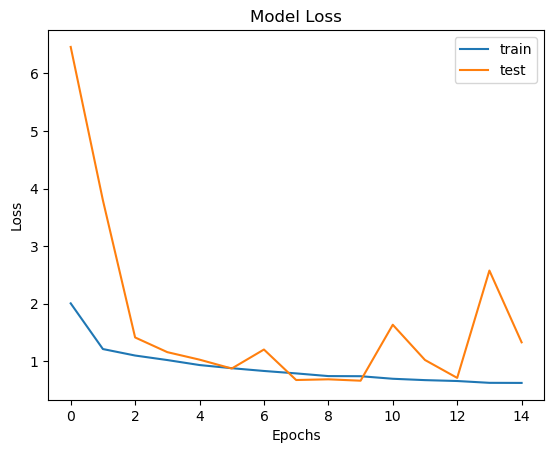

In [59]:
#Đánh giá hiệu suất
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()